In [1]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow as tf
import seaborn as sns
from math import sqrt
from numpy.random import seed
seed(1)
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Verileri İçeri Aktarma Ve Ekrana Gösterme 

In [2]:
# Tekrarlanabilirlik için rastgele tohum düzeltme metodunu kullanalım.
np.random.seed(7)

# veri kümesini yükleyelim
df = pd.read_csv('dccelectricitycivicsblocks34p20130221-1840.csv', engine='python', skipfooter=3)
df.head(10)

,Office,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
0,Date,Values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
1,29/03/2011,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.80000305,31.20000076,31.65000153,30.60000038,32.85000229,31.05000305,32.10000229,31.35000229,31.65000153,30.15000153
2,30/03/2011,96,32.10000229,32.40000153,33.60000229,33,29.70000076,30.90000153,31.50000191,33,...,35.70000076,33.60000229,34.20000076,34.80000305,34.65000153,33.75,33.15000153,32.70000076,31.50000191,33.60000229
3,31/03/2011,96,32.10000229,33.60000229,35.10000229,33.45000076,31.20000076,31.35000038,34.20000076,33.75,...,33,33,35.25,34.35000229,32.40000153,31.20000076,32.84999847,33.45000076,32.10000229,32.10000229
4,01/04/2011,96,32.70000076,34.5,30.30000305,33,33,31.5,30.30000305,32.84999847,...,32.25,33.45000076,33,30.45000076,33.15000153,30.60000229,30.15000153,32.55000305,33,30.15000153
5,02/04/2011,96,31.80000114,32.40000153,30.45000076,33.90000153,33.30000305,30.75000191,30.75,29.85000038,...,34.5,31.80000114,32.10000229,31.80000114,35.25,34.65000153,30.45000076,31.5,33.45000076,32.55000305
6,03/04/2011,96,32.85000229,30.30000114,32.10000229,30,34.05000305,30.75000191,32.10000229,28.80000114,...,34.95000076,31.80000114,35.10000229,33.90000153,31.35000038,35.10000229,35.10000229,33.90000153,31.35000038,35.10000229
7,04/04/2011,96,32.25000381,35.40000153,37.34999847,34.35000229,34.95000076,36.45000076,36.15000153,33.15000153,...,32.55000305,31.65000153,32.10000229,31.95000076,29.39999962,30.75,31.95000076,31.35000229,32.70000076,30.75
8,05/04/2011,96,30.90000153,32.85000229,32.10000229,35.55000305,32.55000305,33,31.80000114,31.5,...,33.30000305,32.25,32.70000076,31.95000267,33.30000305,32.85000229,33.45000076,28.35000229,31.80000305,34.65000153
9,06/04/2011,96,32.55000305,30.30000114,33,29.70000076,33.60000229,32.70000076,28.95000076,28.20000076,...,33.75,30,34.80000305,31.50000191,30.60000229,33.45000076,33.00000381,34.04999924,30.90000153,29.10000038


In [3]:
df2=df.rename(columns=df.iloc[0])
df3=df2.drop(df.index[0])
df3
df3.drop(df3.index[0])
df4=df3.drop('Date', axis=1)
df5=df4.drop('Values', axis=1)
df5
df6=df5.dropna()
df7=df6.values
df7
dataset=np.sum(df7, axis=1, dtype=float)
dataset

array([4981.5001927 , 5166.60016445, 3046.35014537, 3101.10013769,
       4908.60016439, 4858.50017742, 4905.00019836, 4999.95019526,
       3075.90013122, 3023.5501442 , 5004.6001587 , 5199.30019957,
       5226.75017163, 5162.55022428, 4991.55017468, 2950.20010378,
       4883.85017776, 5055.15017129, 5084.10021592, 4914.00019451,
       3581.55014991, 2981.55008892, 2967.00011064, 3515.70014566,
       4721.10016438, 4931.85019494, 5020.05018234, 4799.40017322,
       3043.20012856, 2929.05012318, 3423.45014192, 4949.55017475,
       5155.05015188, 5238.75021174, 5129.10016059, 3088.95013995,
       3017.40010454, 5041.95018196, 5170.80017096, 5250.90023994,
       5239.35021975, 5163.60019308, 3169.65013694, 3034.65012932,
       5056.05021094, 5052.6001988 , 5048.2501869 , 4971.75019264,
       3013.20013239, 2919.45011703, 4830.0002022 , 5007.90018087,
       5028.00018885, 5088.60017207, 5092.35015869, 3069.90011787,
       2909.85011099, 4923.60022544, 5136.75021744, 5233.65021

In [4]:
df3

,Date,Values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
1,29/03/2011,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.80000305,31.20000076,31.65000153,30.60000038,32.85000229,31.05000305,32.10000229,31.35000229,31.65000153,30.15000153
2,30/03/2011,96,32.10000229,32.40000153,33.60000229,33,29.70000076,30.90000153,31.50000191,33,...,35.70000076,33.60000229,34.20000076,34.80000305,34.65000153,33.75,33.15000153,32.70000076,31.50000191,33.60000229
3,31/03/2011,96,32.10000229,33.60000229,35.10000229,33.45000076,31.20000076,31.35000038,34.20000076,33.75,...,33,33,35.25,34.35000229,32.40000153,31.20000076,32.84999847,33.45000076,32.10000229,32.10000229
4,01/04/2011,96,32.70000076,34.5,30.30000305,33,33,31.5,30.30000305,32.84999847,...,32.25,33.45000076,33,30.45000076,33.15000153,30.60000229,30.15000153,32.55000305,33,30.15000153
5,02/04/2011,96,31.80000114,32.40000153,30.45000076,33.90000153,33.30000305,30.75000191,30.75,29.85000038,...,34.5,31.80000114,32.10000229,31.80000114,35.25,34.65000153,30.45000076,31.5,33.45000076,32.55000305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,13/02/2013,96,25,25,25.5,24.5,25,26,25.5,25.5,...,33,32.5,30.5,27.5,26,26,26,26,25.5,26.5
689,14/02/2013,96,26,25.5,26,25.5,25,27,25.5,26.5,...,31,30,30.5,29,28,26.5,25.5,25,25.5,25
690,15/02/2013,96,25.5,24.5,25.5,24.5,25,26.5,25,25.5,...,29,27,28,28,25.5,26,25.5,25.5,24.5,25
691,16/02/2013,96,25,25,24.5,24.5,24.5,26.5,25,25.5,...,24.5,24,24.5,26,24.5,24,25,24.5,25,24


In [5]:
df5

,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.80000305,31.20000076,31.65000153,30.60000038,32.85000229,31.05000305,32.10000229,31.35000229,31.65000153,30.15000153
2,32.10000229,32.40000153,33.60000229,33,29.70000076,30.90000153,31.50000191,33,31.5,30.00000191,...,35.70000076,33.60000229,34.20000076,34.80000305,34.65000153,33.75,33.15000153,32.70000076,31.50000191,33.60000229
3,32.10000229,33.60000229,35.10000229,33.45000076,31.20000076,31.35000038,34.20000076,33.75,34.65000153,35.25,...,33,33,35.25,34.35000229,32.40000153,31.20000076,32.84999847,33.45000076,32.10000229,32.10000229
4,32.70000076,34.5,30.30000305,33,33,31.5,30.30000305,32.84999847,33.15000153,32.70000076,...,32.25,33.45000076,33,30.45000076,33.15000153,30.60000229,30.15000153,32.55000305,33,30.15000153
5,31.80000114,32.40000153,30.45000076,33.90000153,33.30000305,30.75000191,30.75,29.85000038,28.80000114,33.45000076,...,34.5,31.80000114,32.10000229,31.80000114,35.25,34.65000153,30.45000076,31.5,33.45000076,32.55000305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,25,25,25.5,24.5,25,26,25.5,25.5,25,25.5,...,33,32.5,30.5,27.5,26,26,26,26,25.5,26.5
689,26,25.5,26,25.5,25,27,25.5,26.5,26,27,...,31,30,30.5,29,28,26.5,25.5,25,25.5,25
690,25.5,24.5,25.5,24.5,25,26.5,25,25.5,26,26,...,29,27,28,28,25.5,26,25.5,25.5,24.5,25
691,25,25,24.5,24.5,24.5,26.5,25,25.5,25,25.5,...,24.5,24,24.5,26,24.5,24,25,24.5,25,24


In [6]:
df7

array([['32.10000229', '32.40000153', '33.60000229', ..., '32.70000076',
        '31.50000191', '33.60000229'],
       ['32.10000229', '33.60000229', '35.10000229', ..., '33.45000076',
        '32.10000229', '32.10000229'],
       ['31.80000114', '32.40000153', '30.45000076', ..., '31.5',
        '33.45000076', '32.55000305'],
       ...,
       ['25.5', '24.5', '25.5', ..., '25.5', '24.5', '25'],
       ['25', '25', '24.5', ..., '24.5', '25', '24'],
       ['24.5', '24', '24', ..., '25', '25', '25']], dtype=object)

In [7]:
tseries=dataset

In [8]:
tseries.shape

(680,)

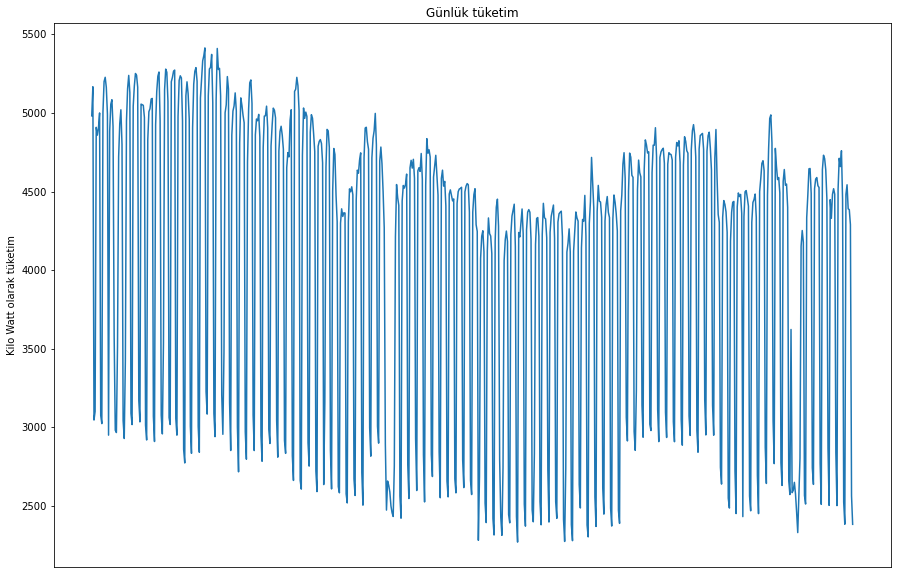

In [9]:
plt.figure(figsize=(15,10))
plt.plot(tseries)
plt.tick_params(
    axis='x',          # değişiklikler x ekseni için geçerlidir
    which='both',      # hem büyük hem de küçük keneler etkilenir.
    bottom=False,      # alt kenar boyunca işaretler kapalı
    top=False,         # üst kenardaki keneler kapalı
    labelbottom=False) # alt kenardaki etiketler kapalı
plt.ylabel('Kilo Watt olarak tüketim')
plt.title("Günlük tüketim")
plt.show()

Text(0.5, 0, 'Kilo Watt olarak tüketim')

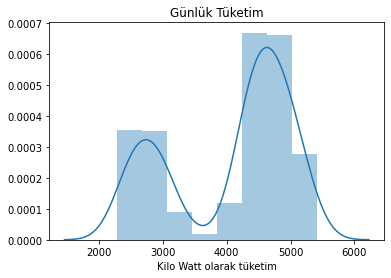

In [10]:
#Histogram Grafiği
sns.distplot(tseries)
plt.title("Günlük Tüketim")
plt.xlabel('Kilo Watt olarak tüketim')

In [11]:
df=pd.DataFrame(tseries)
df

,0
0,4981.500193
1,5166.600164
2,3046.350145
3,3101.100138
4,4908.600164
...,...
675,4390.000000
676,4385.000000
677,4289.500000
678,2564.000000


In [12]:
df=np.array(df)

### Test ve Training Bölümü

In [13]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df[0:train_size,:], df[train_size:len(df),:]

### Form veri kümesi matrisi

In [14]:
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
df

array([[4981.5001927 ],
       [5166.60016445],
       [3046.35014537],
       [3101.10013769],
       [4908.60016439],
       [4858.50017742],
       [4905.00019836],
       [4999.95019526],
       [3075.90013122],
       [3023.5501442 ],
       [5004.6001587 ],
       [5199.30019957],
       [5226.75017163],
       [5162.55022428],
       [4991.55017468],
       [2950.20010378],
       [4883.85017776],
       [5055.15017129],
       [5084.10021592],
       [4914.00019451],
       [3581.55014991],
       [2981.55008892],
       [2967.00011064],
       [3515.70014566],
       [4721.10016438],
       [4931.85019494],
       [5020.05018234],
       [4799.40017322],
       [3043.20012856],
       [2929.05012318],
       [3423.45014192],
       [4949.55017475],
       [5155.05015188],
       [5238.75021174],
       [5129.10016059],
       [3088.95013995],
       [3017.40010454],
       [5041.95018196],
       [5170.80017096],
       [5250.90023994],
       [5239.35021975],
       [5163.600

### MinMaxScaler ile veri kümesini normalleştirelim

#### Training Data

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)
train

array([[0.86253241],
       [0.921413  ],
       [0.24695818],
       [0.26437424],
       [0.8393428 ],
       [0.82340591],
       [0.83819764],
       [0.86840138],
       [0.25635808],
       [0.23970547],
       [0.86988054],
       [0.93181493],
       [0.94054681],
       [0.92012471],
       [0.86572932],
       [0.21637271],
       [0.83146979],
       [0.88596058],
       [0.89516964],
       [0.84106056],
       [0.41720613],
       [0.22634519],
       [0.22171681],
       [0.39625915],
       [0.77969876],
       [0.84673867],
       [0.87479522],
       [0.80460611],
       [0.24595616],
       [0.20964486],
       [0.36691428],
       [0.85236906],
       [0.91773892],
       [0.94436404],
       [0.90948419],
       [0.26050931],
       [0.23774913],
       [0.88176165],
       [0.92274903],
       [0.94822898],
       [0.9445549 ],
       [0.9204587 ],
       [0.2861801 ],
       [0.24323639],
       [0.88624689],
       [0.88514943],
       [0.88376569],
       [0.859

#### Test Data

In [17]:
test = scaler.fit_transform(test)
test

array([[0.95295446],
       [0.95558901],
       [0.91738803],
       [0.31802785],
       [0.23372224],
       [0.91305984],
       [0.95013173],
       [0.95859992],
       [0.92096349],
       [0.86789612],
       [0.30466692],
       [0.2331577 ],
       [0.89593527],
       [0.96499812],
       [0.85001882],
       [0.76176139],
       [0.74275499],
       [0.15619119],
       [0.11610839],
       [0.75442228],
       [0.79488145],
       [0.78547234],
       [0.76778321],
       [0.71885585],
       [0.08242379],
       [0.05871283],
       [0.69777945],
       [0.76721867],
       [0.79092962],
       [0.79281144],
       [0.14753481],
       [0.04554008],
       [0.78001505],
       [0.81313511],
       [0.80447874],
       [0.80955965],
       [0.76439594],
       [0.03820098],
       [0.75649228],
       [0.81595785],
       [0.81878058],
       [0.80127964],
       [0.78152051],
       [0.08731652],
       [0.05212646],
       [0.74294317],
       [0.79036507],
       [0.797

### LSTM modelini yapılandıralım

In [18]:
#Yeniden inceleme süresi
lookback = 5
X_train, Y_train = create_dataset(train, lookback)
X_test, Y_test = create_dataset(test, lookback)

In [19]:
X_train

array([[0.86253241, 0.921413  , 0.24695818, 0.26437424, 0.8393428 ],
       [0.921413  , 0.24695818, 0.26437424, 0.8393428 , 0.82340591],
       [0.24695818, 0.26437424, 0.8393428 , 0.82340591, 0.83819764],
       ...,
       [0.79366336, 0.8323127 , 0.84471866, 0.82467826, 0.77903069],
       [0.8323127 , 0.84471866, 0.82467826, 0.77903069, 0.2258521 ],
       [0.84471866, 0.82467826, 0.77903069, 0.2258521 , 0.18179503]])

In [20]:
Y_train

array([0.82340591, 0.83819764, 0.86840138, 0.25635808, 0.23970547,
       0.86988054, 0.93181493, 0.94054681, 0.92012471, 0.86572932,
       0.21637271, 0.83146979, 0.88596058, 0.89516964, 0.84106056,
       0.41720613, 0.22634519, 0.22171681, 0.39625915, 0.77969876,
       0.84673867, 0.87479522, 0.80460611, 0.24595616, 0.20964486,
       0.36691428, 0.85236906, 0.91773892, 0.94436404, 0.90948419,
       0.26050931, 0.23774913, 0.88176165, 0.92274903, 0.94822898,
       0.9445549 , 0.9204587 , 0.2861801 , 0.24323639, 0.88624689,
       0.88514943, 0.88376569, 0.85943092, 0.23641311, 0.20659109,
       0.81434003, 0.87093029, 0.87732413, 0.89660108, 0.89779396,
       0.25444947, 0.20353731, 0.84411434, 0.91191768, 0.94274172,
       0.95123503, 0.85303708, 0.25678752, 0.21890162, 0.40231898,
       0.91535317, 0.957104  , 0.95075787, 0.89197271, 0.25201599,
       0.23794   , 0.93157636, 0.9404991 , 0.95280964, 0.95514767,
       0.25025053, 0.21642042, 0.8609578 , 0.93424841, 0.94355

In [21]:
#Girdiyi [örnekler, zaman adımları, özellikler] olacak şekilde yeniden şekillendirelim
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [22]:
X_train.shape[0]

538

In [23]:
X_train.shape[1]

1

In [24]:
# LSTM ağı oluşturalım
model = tf.keras.Sequential()
model.add(LSTM(4, input_shape=(1, lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
430/430 - 4s - loss: 0.2267 - val_loss: 0.0988
Epoch 2/100
430/430 - 1s - loss: 0.1107 - val_loss: 0.0819
Epoch 3/100
430/430 - 1s - loss: 0.0954 - val_loss: 0.0726
Epoch 4/100
430/430 - 1s - loss: 0.0869 - val_loss: 0.0664
Epoch 5/100
430/430 - 1s - loss: 0.0793 - val_loss: 0.0606
Epoch 6/100
430/430 - 1s - loss: 0.0739 - val_loss: 0.0563
Epoch 7/100
430/430 - 1s - loss: 0.0680 - val_loss: 0.0517
Epoch 8/100
430/430 - 1s - loss: 0.0638 - val_loss: 0.0482
Epoch 9/100
430/430 - 1s - loss: 0.0601 - val_loss: 0.0465
Epoch 10/100
430/430 - 1s - loss: 0.0576 - val_loss: 0.0430
Epoch 11/100
430/430 - 1s - loss: 0.0554 - val_loss: 0.0408
Epoch 12/100
430/430 - 1s - loss: 0.0518 - val_loss: 0.0428
Epoch 13/100
430/430 - 1s - loss: 0.0515 - val_loss: 0.0408
Epoch 14/100
430/430 - 1s - loss: 0.0503 - val_loss: 0.0363
Epoch 15/100
430/430 - 1s - loss: 0.0488 - val_loss: 0.0357
Epoch 16/100
430/430 - 1s - loss: 0.0468 - val_loss: 0.0385
Epoch 17/100
430/430 - 0s - loss: 0.0459 - val_lo

dict_keys(['loss', 'val_loss'])


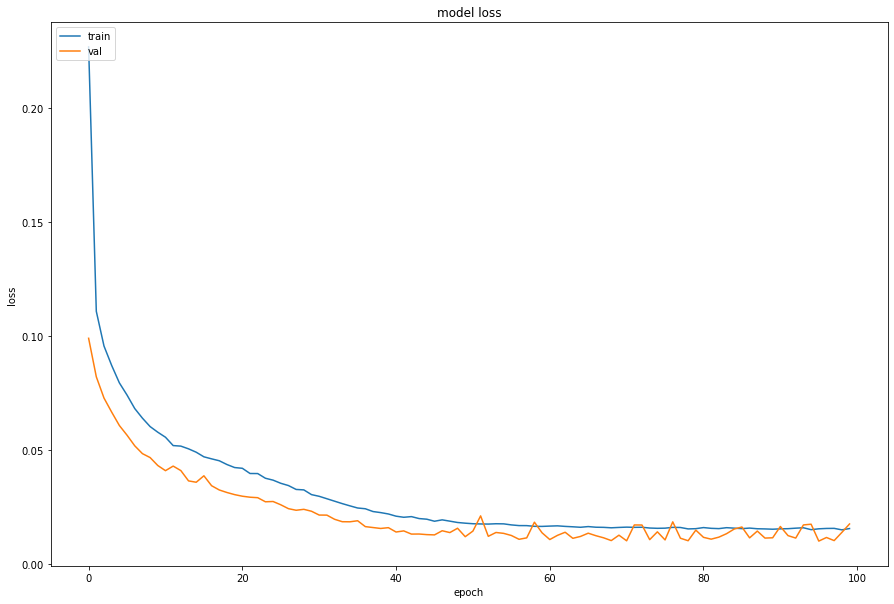

In [25]:
plt.figure(figsize=(15,10))
#history'deki tüm verileri listeleyelim
print(history.history.keys())
# Doğruluk için Geçmiş verileri düzenleme yapalım
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [26]:
# Oluşturduğumuz Tahminleri Eşitleyelim
trainpred = model.predict(X_train)
testpred = model.predict(X_test)

In [27]:
trainpred

array([[ 7.82691956e-01],
       [ 8.65264177e-01],
       [ 6.67741716e-01],
       [ 5.31441748e-01],
       [ 5.68671972e-02],
       [ 6.48078859e-01],
       [ 7.95806348e-01],
       [ 8.78899574e-01],
       [ 8.56018066e-01],
       [ 6.33424044e-01],
       [ 1.40008524e-01],
       [ 2.32444152e-01],
       [ 7.25234985e-01],
       [ 7.25445390e-01],
       [ 6.25875592e-01],
       [ 5.47360539e-01],
       [ 1.07910976e-01],
       [ 5.87904394e-01],
       [ 6.23478413e-01],
       [ 6.26572192e-01],
       [ 7.09082425e-01],
       [ 7.45962620e-01],
       [ 6.67015791e-01],
       [ 2.33043894e-01],
       [ 9.89155322e-02],
       [ 6.83604658e-01],
       [ 6.26566291e-01],
       [ 9.60399926e-01],
       [ 8.79371762e-01],
       [ 8.24611962e-01],
       [ 3.97794604e-01],
       [ 9.94152278e-02],
       [ 7.83601344e-01],
       [ 9.05985177e-01],
       [ 9.04651105e-01],
       [ 8.79130602e-01],
       [ 6.64195955e-01],
       [ 1.53763667e-01],
       [ 1.5

In [28]:
testpred

array([[ 0.7695591 ],
       [ 0.9094249 ],
       [ 0.9131194 ],
       [ 0.8343433 ],
       [ 0.64570963],
       [ 0.15543364],
       [ 0.23873003],
       [ 0.7501281 ],
       [ 0.88309956],
       [ 0.8878917 ],
       [ 0.5648183 ],
       [ 0.53310496],
       [ 0.27324295],
       [ 0.31158328],
       [ 0.669572  ],
       [ 0.75293595],
       [ 0.74457294],
       [ 0.74618447],
       [ 0.60951406],
       [ 0.16382639],
       [ 0.15329082],
       [ 0.67992747],
       [ 0.7716831 ],
       [ 0.74818736],
       [ 0.87788147],
       [ 0.6981363 ],
       [-0.0156896 ],
       [ 0.6638505 ],
       [ 0.80917454],
       [ 0.7948253 ],
       [ 0.8505156 ],
       [ 0.7884223 ],
       [ 0.16626815],
       [ 0.1482639 ],
       [ 0.7539352 ],
       [ 0.6879657 ],
       [ 0.65088207],
       [ 0.7688647 ],
       [ 0.17038958],
       [ 0.13667996],
       [ 0.7413896 ],
       [ 0.81797343],
       [ 0.7910951 ],
       [ 0.8855944 ],
       [ 0.7583436 ],
       [ 0

In [29]:
# Tahminleri normal değerlere dönüştürelim
trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
testpred = scaler.inverse_transform(testpred)
Y_test = scaler.inverse_transform([Y_test])
LSTMtahmin = testpred

In [30]:
Y_train.shape

(1, 538)

In [31]:
Y_test.shape

(1, 130)

In [32]:
X_train.shape

(538, 1, 5)

In [33]:
X_test.shape

(130, 1, 5)

In [34]:
Y_train

array([[4518.28951509, 4557.59113815, 4637.8424781 , 3011.6434176 ,
        2967.39742769, 4641.77260773, 4806.33226731, 4829.53286879,
        4775.27134202, 4630.74281586, 2905.40228055, 4539.71522927,
        4684.49726678, 4708.96572332, 4565.19789723, 3439.01669686,
        2931.89915677, 2919.60157603, 3383.3605489 , 4402.1595992 ,
        4580.28464288, 4654.83090304, 4468.33843892, 2984.00551222,
        2887.52640548, 3305.39123188, 4595.24459172, 4768.93231222,
        4839.67525246, 4746.9994882 , 3022.67323035, 2962.19943991,
        4673.34069105, 4782.24416242, 4849.94440544, 4840.18237672,
        4776.15877125, 3090.88053001, 2976.77908865, 4685.25797653,
        4682.34204071, 4678.66542886, 4614.00795392, 2958.64964103,
        2879.41252047, 4494.20145533, 4644.56177266, 4661.55021527,
        4712.76906743, 4715.93854042, 3006.57223143, 2871.29863554,
        4573.31180319, 4753.46528423, 4835.36475348, 4857.93146626,
        4597.01951125, 3012.78443227, 2912.12160

In [35]:
Y_test

array([[4756.5, 4855. , 4877.5, 4777.5, 4636.5, 3140. , 2950. , 4711. ,
        4894.5, 4589. , 4354.5, 4304. , 2745.5, 2639. , 4335. , 4442.5,
        4417.5, 4370.5, 4240.5, 2549.5, 2486.5, 4184.5, 4369. , 4432. ,
        4437. , 2722.5, 2451.5, 4403. , 4491. , 4468. , 4481.5, 4361.5,
        2432. , 4340.5, 4498.5, 4506. , 4459.5, 4407. , 2562.5, 2469. ,
        4304.5, 4430.5, 4449.5, 4484. , 4335. , 2695. , 2451. , 4500. ,
        4581. , 4679. , 4696. , 4632.5, 2873. , 2643. , 4475. , 4771. ,
        4965. , 4987.5, 4809. , 3042.5, 2769. , 4774.5, 4660.5, 4576. ,
        4589. , 4491.5, 2774.5, 2630.5, 4564. , 4640. , 4540.5, 4547.5,
        4399. , 2658.5, 2572.5, 3622.5, 2584.5, 2599.5, 2650. , 2576. ,
        2460. , 2330.5, 2560.5, 2803. , 4152. , 4252. , 4177.5, 2566.5,
        2512. , 4333.5, 4477.5, 4644.5, 4646.5, 4487.5, 2741.5, 2637. ,
        4518. , 4579.5, 4589. , 4537. , 4526. , 2771. , 2510. , 4639. ,
        4731. , 4709.5, 4638.5, 4454. , 2869.5, 2503.5, 4448.5, 

In [36]:
X_train

array([[[0.86253241, 0.921413  , 0.24695818, 0.26437424, 0.8393428 ]],

       [[0.921413  , 0.24695818, 0.26437424, 0.8393428 , 0.82340591]],

       [[0.24695818, 0.26437424, 0.8393428 , 0.82340591, 0.83819764]],

       ...,

       [[0.79366336, 0.8323127 , 0.84471866, 0.82467826, 0.77903069]],

       [[0.8323127 , 0.84471866, 0.82467826, 0.77903069, 0.2258521 ]],

       [[0.84471866, 0.82467826, 0.77903069, 0.2258521 , 0.18179503]]])

In [37]:
X_test

array([[[0.95295446, 0.95558901, 0.91738803, 0.31802785, 0.23372224]],

       [[0.95558901, 0.91738803, 0.31802785, 0.23372224, 0.91305984]],

       [[0.91738803, 0.31802785, 0.23372224, 0.91305984, 0.95013173]],

       [[0.31802785, 0.23372224, 0.91305984, 0.95013173, 0.95859992]],

       [[0.23372224, 0.91305984, 0.95013173, 0.95859992, 0.92096349]],

       [[0.91305984, 0.95013173, 0.95859992, 0.92096349, 0.86789612]],

       [[0.95013173, 0.95859992, 0.92096349, 0.86789612, 0.30466692]],

       [[0.95859992, 0.92096349, 0.86789612, 0.30466692, 0.2331577 ]],

       [[0.92096349, 0.86789612, 0.30466692, 0.2331577 , 0.89593527]],

       [[0.86789612, 0.30466692, 0.2331577 , 0.89593527, 0.96499812]],

       [[0.30466692, 0.2331577 , 0.89593527, 0.96499812, 0.85001882]],

       [[0.2331577 , 0.89593527, 0.96499812, 0.85001882, 0.76176139]],

       [[0.89593527, 0.96499812, 0.85001882, 0.76176139, 0.74275499]],

       [[0.96499812, 0.85001882, 0.76176139, 0.74275499, 0.15619

### Test Verilerinde  Tahmin Doğruluğu

In [38]:
#RMSE'yi Hesaplayalım
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
valScore = math.sqrt(mean_squared_error(Y_test[0], testpred[:,0]))
print('Test Score: %.2f RMSE' % (valScore))

Train Score: 334.21 RMSE
Test Score: 398.61 RMSE


In [39]:
# Train Tahminleri
trainpredPlot = np.empty_like(df)
trainpredPlot[:, :] = np.nan
trainpredPlot[lookback:len(trainpred)+lookback, :] = trainpred

In [40]:
# Test Tahminleri
testpredPlot = np.empty_like(df)
testpredPlot[:, :] = np.nan
testpredPlot[len(trainpred)+(lookback*2)+1:len(df)-1, :] = testpred

In [41]:
Y_test=Y_test.reshape(-1)
Y_test.shape
Y_test=pd.Series(Y_test)

In [42]:
Y_test

0      4756.5
1      4855.0
2      4877.5
3      4777.5
4      4636.5
        ...  
125    4543.0
126    4390.0
127    4385.0
128    4289.5
129    2564.0
Length: 130, dtype: float64

In [43]:
LSTMtahmin=LSTMtahmin.reshape(-1)
LSTMtahmin.shape
LSTMtahmin=pd.Series(LSTMtahmin)

In [44]:
LSTMtahmin

0      4375.218750
1      4746.841797
2      4756.658203
3      4547.350098
4      4046.150391
          ...     
125    4953.318359
126    4450.203613
127    4601.997070
128    4527.696289
129    2875.955078
Length: 130, dtype: float32

In [45]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Ortalama Yön Doğruluğu """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [46]:
mda(Y_test, LSTMtahmin)

0.9846153846153847

In [47]:
mse = mean_squared_error(Y_test, LSTMtahmin)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 398.605332


In [48]:
np.mean(Y_test)

3909.15

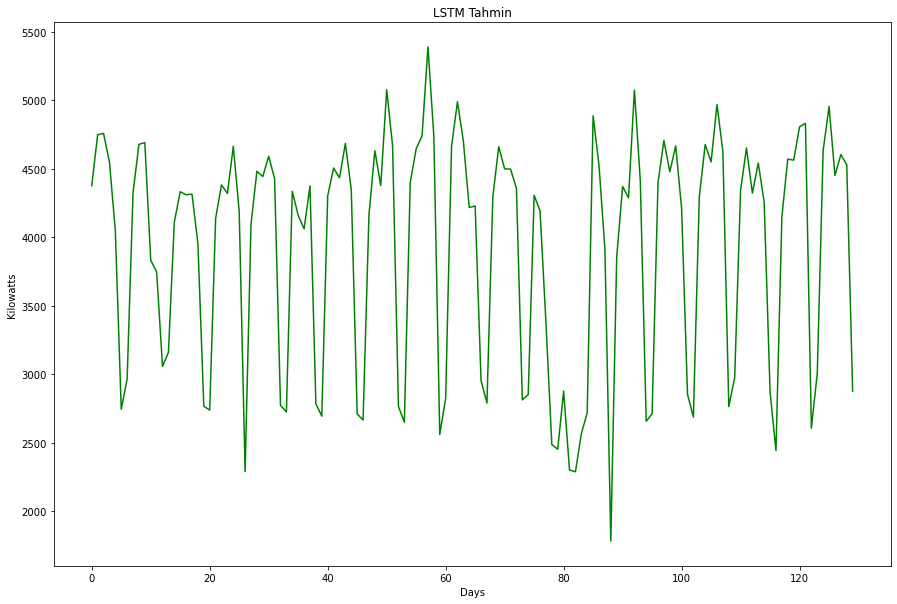

In [49]:
plt.figure(figsize=(15,10))
plt.plot(LSTMtahmin, color="green")
plt.xlabel('Days')
plt.ylabel('Kilowatts')
plt.title("LSTM Tahmin")
plt.show()

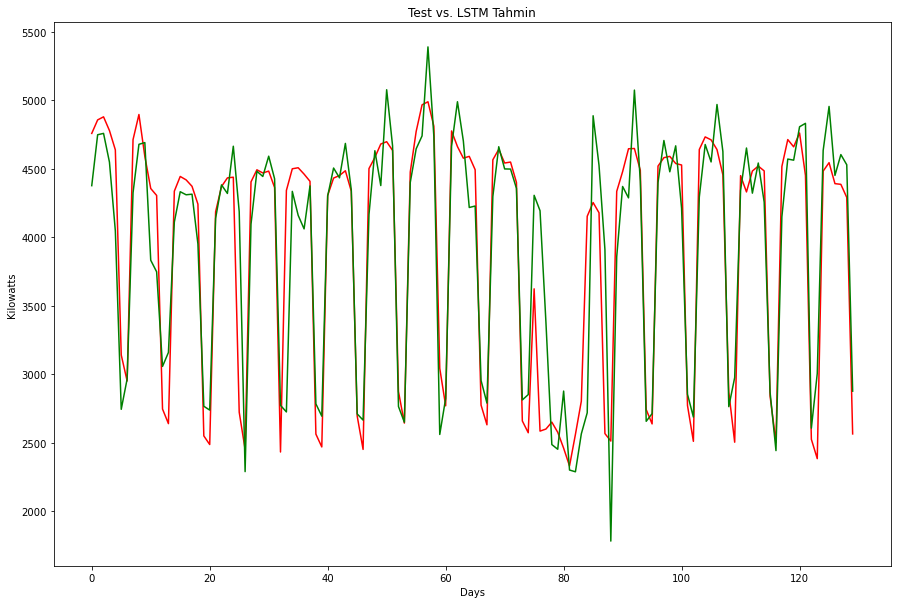

In [50]:
plt.figure(figsize=(15,10))
plt.plot(Y_test,color="red")
plt.plot(LSTMtahmin,color="green")
plt.xlabel('Days')
plt.ylabel('Kilowatts')
plt.title("Test vs. LSTM Tahmin")
plt.show()

# ARİMA MODELİ

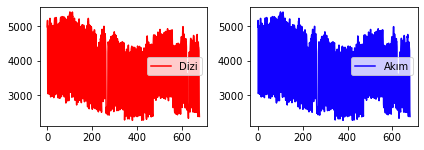

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(dataset, model='additive', freq=1)
trend=decomposition.trend
plt.subplot(221)
plt.plot(dataset,color='#ff0000', label='Dizi')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend,color='#1100ff', label='Akım')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

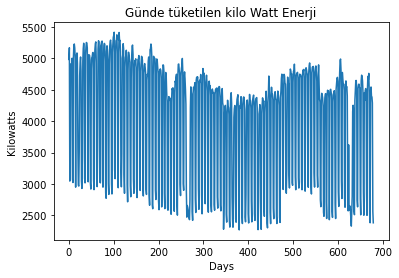

In [52]:
plt.plot(dataset)
plt.xlabel('Days')
plt.ylabel('Kilowatts')
plt.title("Günde tüketilen kilo Watt Enerji")
plt.show()

In [53]:
train_df=dataset[:554]
train_df

array([4981.5001927 , 5166.60016445, 3046.35014537, 3101.10013769,
       4908.60016439, 4858.50017742, 4905.00019836, 4999.95019526,
       3075.90013122, 3023.5501442 , 5004.6001587 , 5199.30019957,
       5226.75017163, 5162.55022428, 4991.55017468, 2950.20010378,
       4883.85017776, 5055.15017129, 5084.10021592, 4914.00019451,
       3581.55014991, 2981.55008892, 2967.00011064, 3515.70014566,
       4721.10016438, 4931.85019494, 5020.05018234, 4799.40017322,
       3043.20012856, 2929.05012318, 3423.45014192, 4949.55017475,
       5155.05015188, 5238.75021174, 5129.10016059, 3088.95013995,
       3017.40010454, 5041.95018196, 5170.80017096, 5250.90023994,
       5239.35021975, 5163.60019308, 3169.65013694, 3034.65012932,
       5056.05021094, 5052.6001988 , 5048.2501869 , 4971.75019264,
       3013.20013239, 2919.45011703, 4830.0002022 , 5007.90018087,
       5028.00018885, 5088.60017207, 5092.35015869, 3069.90011787,
       2909.85011099, 4923.60022544, 5136.75021744, 5233.65021

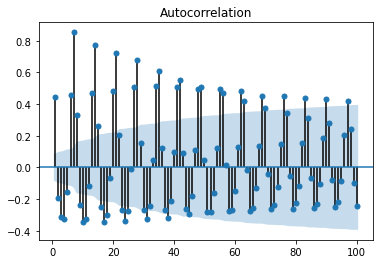

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train_df, lags=100, zero=False);


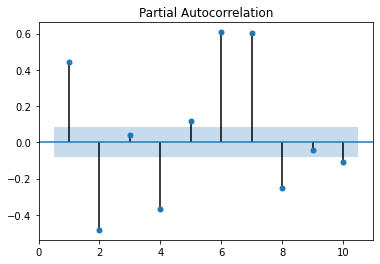

In [55]:
plot_pacf(train_df, lags=10, zero=False);

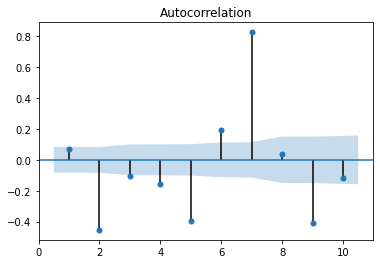

In [56]:
plot_acf(np.diff(train_df, 1), lags=10, zero=False);

In [57]:
test_df=dataset[554:693]

In [58]:
window_size = 7

numbers_series = pd.Series(train_df)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()

moving_averages_list = moving_averages.tolist()
ts7 = moving_averages_list[window_size - 1:]
ts7=np.array(ts7)
print(ts7)

[4423.95016863 4426.58588328 4127.91444996 4124.65730693 4396.58588136
 4438.11445782 4490.72159985 4527.51446069 4526.31445775 4508.35731098
 4774.11445863 4781.335889   4764.87874848 4720.20018032 4494.34302684
 4207.20015744 4209.60015842 4014.15015384 3966.42872428 3944.67872128
 3959.82871954 4133.8072943  4142.61444282 4137.19301604 4124.01444408
 4156.65015984 4188.53586798 4219.77872932 4266.87872752 4273.41444343
 4286.03586934 4517.25016077 4548.85730309 4562.55017281 4562.63588824
 4567.56446431 4579.09303531 4581.55732456 4583.57161442 4566.68590411
 4537.73589653 4499.50732123 4192.30731256 4156.56445257 4413.04303441
 4406.16445869 4402.65017155 4408.41445515 4425.64302173 4433.74301965
 4432.37159022 4445.74302211 4464.15017019 4493.52874484 4518.06446212
 4497.96446582 4499.01446778 4505.91446904 4307.50731386 4309.05016518
 4315.50016376 4315.28587505 4332.77158957 4330.62873243 4339.17873411
 4576.86445837 4588.15731976 4586.2287516  4588.20018196 4300.00731877
 4284.

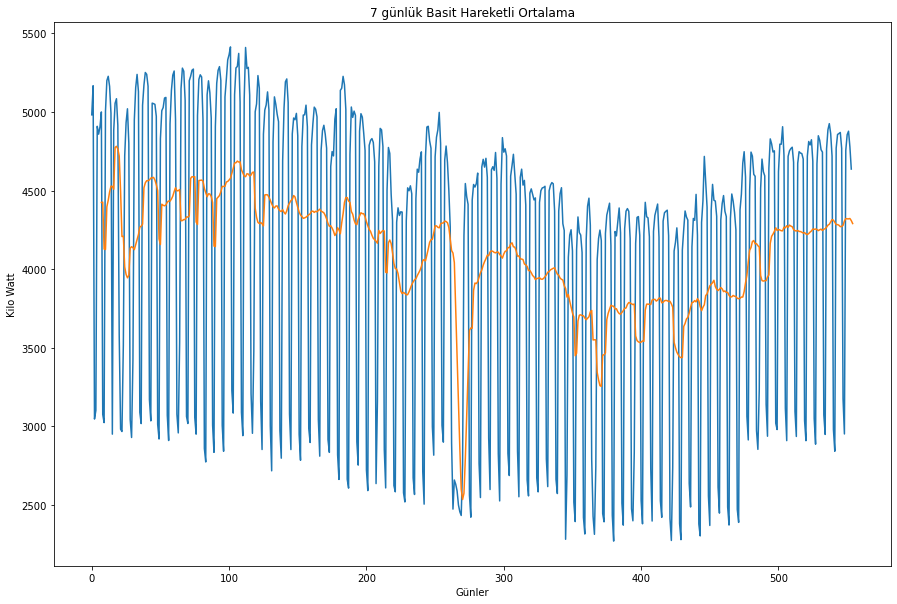

In [59]:
n1=math.nan
n7=np.array([n1,n1,n1,n1,n1,n1,n1])
ts7=np.concatenate([n7,ts7])
plt.figure(figsize=(15,10))
plt.plot(train_df)
plt.plot(ts7)
plt.xlabel('Günler')
plt.ylabel('Kilo Watt')
plt.title("7 günlük Basit Hareketli Ortalama")
plt.show()

In [60]:
import statsmodels.tsa.stattools as ts
#Dickey-Fuller Test
result = ts.adfuller(train_df, 1)
result

(-20.93887846541725,
 0.0,
 1,
 552,
 {'1%': -3.4422521197633187,
  '5%': -2.866790184232015,
  '10%': -2.569566175304558},
 8875.183115493921)

In [61]:
import pmdarima as pm
Arima_model=pm.auto_arima(train_df, start_p=0, start_q=0, max_p=10, max_q=10, start_P=0, start_Q=0, max_P=10, max_Q=10, 
                          m=14, stepwise=True, seasonal=True, information_criterion='aic', trace=True, d=1, D=1, 
                          error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[14]             : AIC=8610.763, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[14]             : AIC=8548.188, Time=0.55 sec
 ARIMA(0,1,1)(0,1,1)[14]             : AIC=inf, Time=1.35 sec
 ARIMA(1,1,0)(0,1,0)[14]             : AIC=8579.406, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[14]             : AIC=8548.391, Time=1.46 sec
 ARIMA(1,1,0)(1,1,1)[14]             : AIC=8542.359, Time=1.54 sec
 ARIMA(1,1,0)(0,1,1)[14]             : AIC=8550.962, Time=0.29 sec
 ARIMA(1,1,0)(2,1,1)[14]             : AIC=8544.029, Time=4.97 sec
 ARIMA(1,1,0)(1,1,2)[14]             : AIC=8543.749, Time=4.24 sec
 ARIMA(1,1,0)(0,1,2)[14]             : AIC=8552.812, Time=0.70 sec
 ARIMA(1,1,0)(2,1,2)[14]             : AIC=inf, Time=5.72 sec
 ARIMA(0,1,0)(1,1,1)[14]             : AIC=8565.702, Time=1.26 sec
 ARIMA(2,1,0)(1,1,1)[14]             : AIC=8417.212, Time=0.88 sec
 ARIMA(2,1,0)(0,1,1)[14]             : AIC=8421.929, Time=0.40 sec
 ARIMA(2,1,0)(1,1,0)[14]     

In [62]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  554
Model:             SARIMAX(2, 1, 0)x(1, 1, [1], 14)   Log Likelihood               -4203.606
Date:                              Tue, 19 Jan 2021   AIC                           8417.212
Time:                                      05:01:43   BIC                           8438.660
Sample:                                           0   HQIC                          8425.601
                                              - 554                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3042      0.029    -10.316      0.000      -0.362      -0.246
ar.L2         -0.4659      0.028    -16.722      0.000      -0.520      -0.411
ar.S.L14      -0.5794      0.106     -5.475      0.000      -0.787      -0.372
ma.S.L14       0.3246      0.126      2.573      0.010       0.077       0.572
sigma2      3.556e+05   1.35e+04     26.408      0.000    3.29e+05    3.82e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):               396.52
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               0.14   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
ARIMAtahmin=pd.DataFrame(Arima_model.predict(n_periods=126), index=test_df)
ARIMAtahmin=np.array(ARIMAtahmin)

In [64]:
ARIMAtahmin

array([[2942.42081611],
       [2792.09376583],
       [4689.7510844 ],
       [4806.08145043],
       [4803.01290926],
       [4789.09551541],
       [4705.50210819],
       [3094.35737648],
       [2893.39718592],
       [4701.3769366 ],
       [4805.94869387],
       [4839.26569607],
       [4740.10590913],
       [4598.27014269],
       [2887.57374771],
       [2740.95129399],
       [4653.05248147],
       [4754.60835184],
       [4757.62669741],
       [4754.40638991],
       [4660.48292636],
       [3060.78941579],
       [2846.26228456],
       [4652.27972008],
       [4753.50704905],
       [4780.61406955],
       [4680.86930928],
       [4539.52100885],
       [2838.49700621],
       [2689.71306816],
       [4593.42955225],
       [4703.55742527],
       [4703.05308547],
       [4693.62834582],
       [4605.69012254],
       [2999.36511459],
       [2792.6973195 ],
       [4599.85055809],
       [4703.01640328],
       [4733.72161849],
       [4634.31531086],
       [4492.684

In [65]:
ARIMAtahmin=ARIMAtahmin.reshape(126,-1)
ARIMAtahmin

array([[2942.42081611],
       [2792.09376583],
       [4689.7510844 ],
       [4806.08145043],
       [4803.01290926],
       [4789.09551541],
       [4705.50210819],
       [3094.35737648],
       [2893.39718592],
       [4701.3769366 ],
       [4805.94869387],
       [4839.26569607],
       [4740.10590913],
       [4598.27014269],
       [2887.57374771],
       [2740.95129399],
       [4653.05248147],
       [4754.60835184],
       [4757.62669741],
       [4754.40638991],
       [4660.48292636],
       [3060.78941579],
       [2846.26228456],
       [4652.27972008],
       [4753.50704905],
       [4780.61406955],
       [4680.86930928],
       [4539.52100885],
       [2838.49700621],
       [2689.71306816],
       [4593.42955225],
       [4703.55742527],
       [4703.05308547],
       [4693.62834582],
       [4605.69012254],
       [2999.36511459],
       [2792.6973195 ],
       [4599.85055809],
       [4703.01640328],
       [4733.72161849],
       [4634.31531086],
       [4492.684

In [66]:
len(ARIMAtahmin)

126

In [67]:
mse = mean_squared_error(test_df, ARIMAtahmin)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 1280.505178


In [68]:
np.mean(test_df)

3862.4563492063494

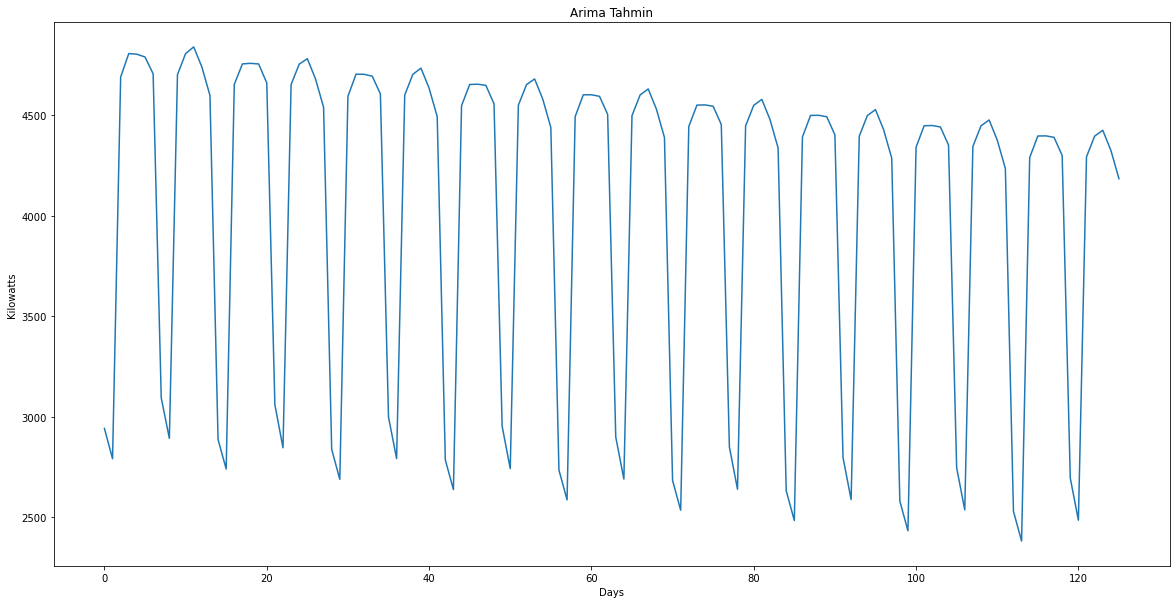

In [69]:
plt.figure(figsize=(20,10))
plt.plot(ARIMAtahmin)
plt.xlabel('Days')
plt.ylabel('Kilowatts')
plt.title("Arima Tahmin")

plt.show()

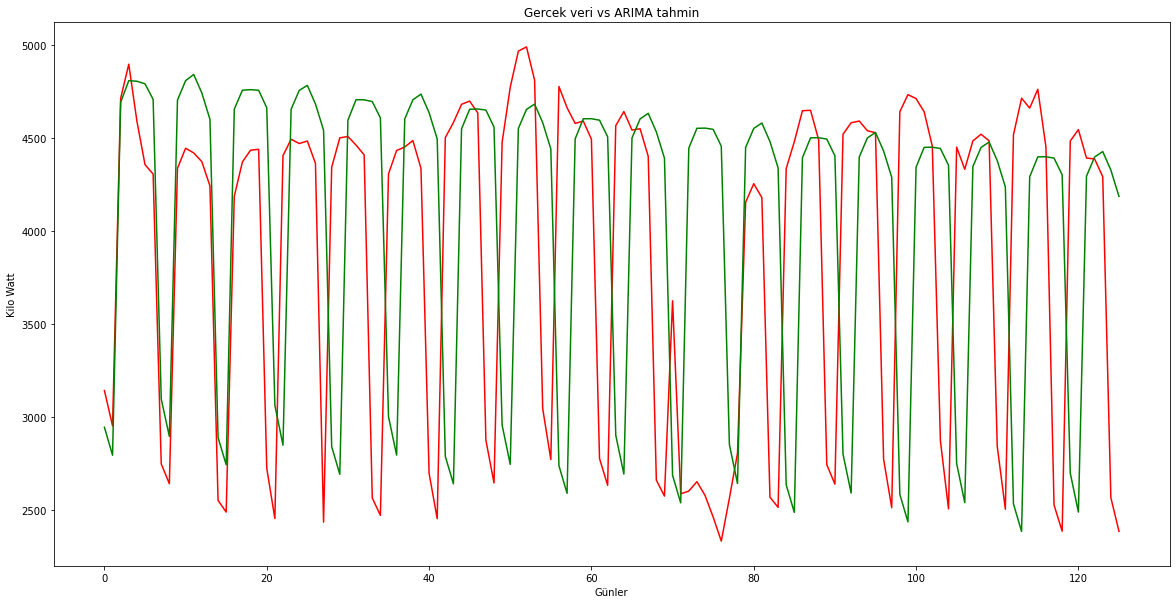

In [70]:
plt.figure(figsize=(20,10))
plt.plot(test_df, color="red")
plt.plot(ARIMAtahmin, color="green")
plt.xlabel('Günler')
plt.ylabel('Kilo Watt')
plt.title("Gercek veri vs ARIMA tahmin")
plt.show()

# LSTM vs ARİMA

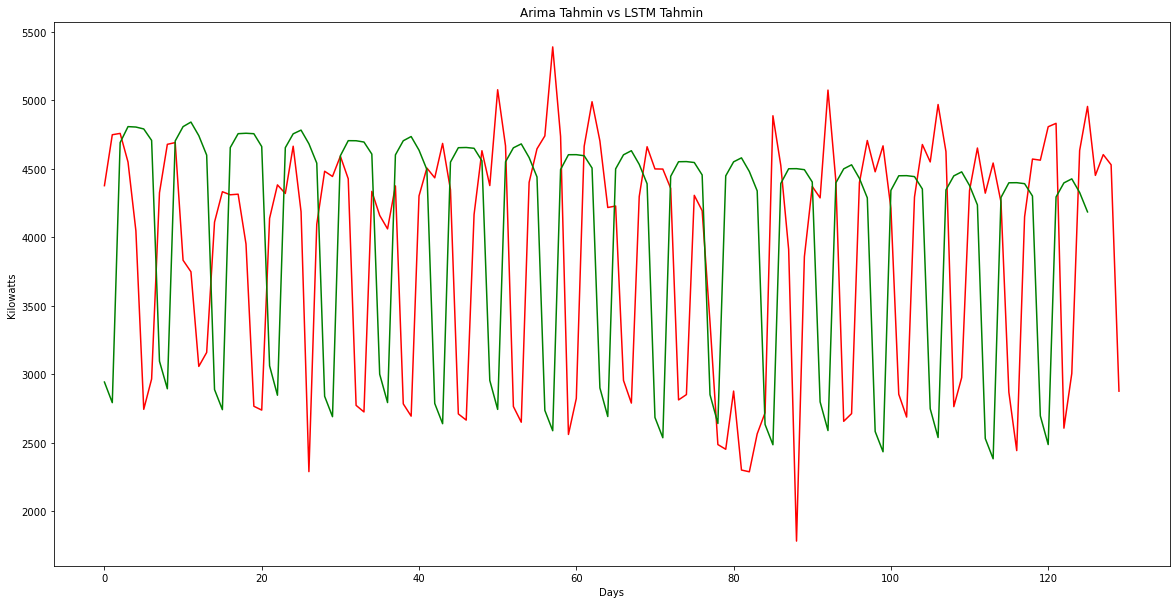

In [71]:
plt.figure(figsize=(20,10))
plt.plot(LSTMtahmin, color="red")
plt.plot(ARIMAtahmin, color="green")
plt.xlabel('Days')
plt.ylabel('Kilowatts')
plt.title("Arima Tahmin vs LSTM Tahmin")
plt.show()

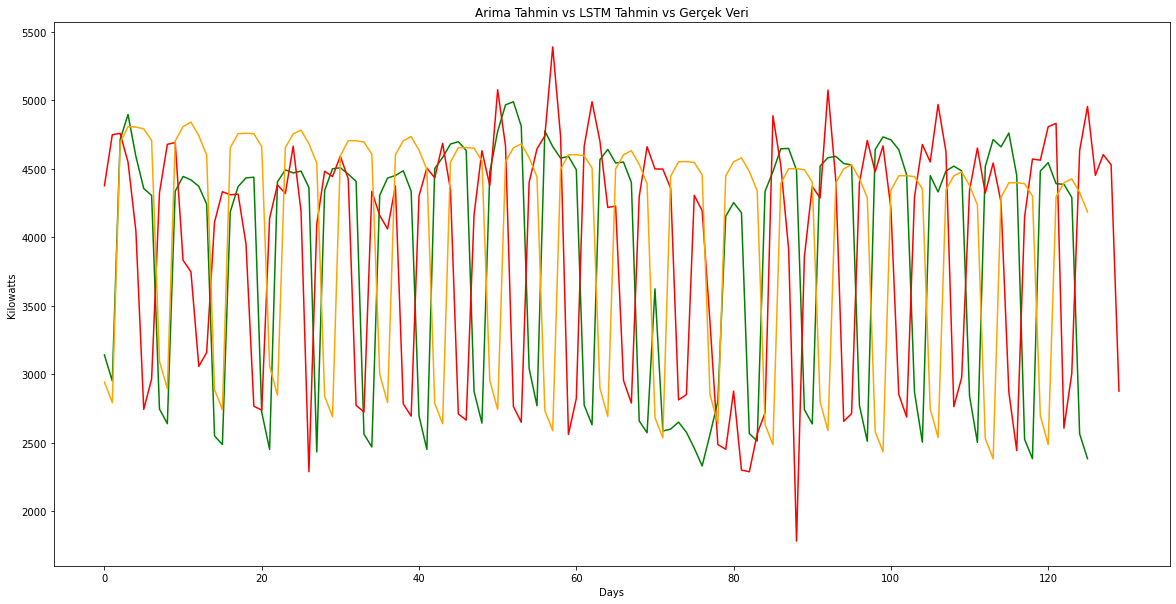

In [72]:
plt.figure(figsize=(20,10))
plt.plot(test_df, color="green")
plt.plot(LSTMtahmin, color="red")
plt.plot(ARIMAtahmin, color="orange")
plt.xlabel('Days')
plt.ylabel('Kilowatts')
plt.title("Arima Tahmin vs LSTM Tahmin vs Gerçek Veri")
plt.show()